In [1]:
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "1"

In [2]:

from keras.models import load_model

pretrained_model = load_model("MobileNetV3Large.keras")

/Users/vpedos/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [3]:
# Import Data Science Libraries
import numpy as np
import pandas as pd
import random

# Import visualization libraries
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import cv2

# Tensorflow Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.mobilenet_v3 import preprocess_input

from tensorflow.keras.applications import MobileNetV3Large
from keras.layers import Conv2D , MaxPool2D , Input , GlobalAveragePooling2D ,AveragePooling2D, Dense , Dropout ,Activation, Flatten , BatchNormalization

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.callbacks import Callback, EarlyStopping, ModelCheckpoint
from tensorflow.keras import Model



In [5]:
TRAIN_DIR = './Walnut/train'
TEST_DIR = './Walnut/test'

train_generator = ImageDataGenerator(
    preprocessing_function = preprocess_input
)

test_generator = ImageDataGenerator(
    preprocessing_function = preprocess_input
)

In [6]:
# Split the data into three categories.
train_images = train_generator.flow_from_directory(
    TRAIN_DIR,
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='binary',
    batch_size=32,
    shuffle=True,
    seed=42
)

test_images = test_generator.flow_from_directory(
    TEST_DIR,
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='binary',
    batch_size=32,
    shuffle=False
)

Found 450 images belonging to 2 classes.
Found 103 images belonging to 2 classes.


In [7]:
# Resize Layer
resize_and_rescale = keras.Sequential([
  layers.Resizing(224,224),
  layers.Rescaling(1./255),
])

# Setup data augmentation
data_augmentation = keras.Sequential([
  layers.RandomHeight(0.03),
  layers.RandomWidth(0.03),                       
], name="data_augmentation")

In [9]:
# Load the pretained model

pretrained_model.trainable = False

In [10]:
# Build model walnut right
inputs = pretrained_model.input
x = resize_and_rescale(inputs)


x = Dense(512, activation='relu')(pretrained_model.output)
x = Dropout(0.4)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.4)(x)
x = Dense(32, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(8, activation='relu')(x)
x = Dropout(0.3)(x)

outputs = Dense(1, activation='sigmoid')(x)

model = Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer = tf.keras.optimizers.Adam(0.001),
    loss = tf.keras.losses.binary_crossentropy,
    metrics=['accuracy']
)

In [26]:
model.summary()

Model: "functional_46"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, 224, 224,  │          0 │ input_layer_1[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv (Conv2D)       │ (None, 112, 112,  │        432 │ rescaling[0][0]   │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv_bn             │ (None, 112, 112,  │         64 │ conv[0][0]        │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 112, 112,  │          0 │ conv_bn[0][0]     │
│ (Activation)        │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        144 │ activation[0][0]  │
│ (DepthwiseConv2D)   │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │         64 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu (ReLU)        │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        256 │ re_lu[0][0]       │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_add   │ (None, 112, 112,  │          0 │ activation[0][0], │
│ (Add)               │ 16)               │            │ expanded_conv_pr… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_1_ex… │ (None, 112, 112,  │      1,024 │ expanded_conv_ad… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_1_ex… │ (None, 112, 112,  │        256 │ expanded_conv_1_… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_1 (ReLU)      │ (None, 112, 112,  │          0 │ expanded_conv_1_… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_1_de… │ (None, 113, 113,  │          0 │ re_lu_1[0][0]     │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_1_de… │ (None, 56, 56,    │        576 │ expanded_conv_1_… │
│ (DepthwiseConv2D)   │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_1_de… │ (None, 56, 56,    │        256 │ expanded_conv_1_

 Total params: 3,558,449 (13.57 MB)

 Trainable params: 562,097 (2.14 MB)

 Non-trainable params: 2,996,352 (11.43 MB)

In [13]:
# Create checkpoint callback
checkpoint_path = "./Walnut CNN-Model/Checkpoint/model_walnut.keras"
checkpoint_callback = ModelCheckpoint(checkpoint_path,
                                      save_weights_only=False,
                                      monitor="val_accuracy",
                                      save_best_only=True)


# Create callback to visualize data
tb_callback = tf.keras.callbacks.TensorBoard(log_dir='./Walnut CNN-Model/Graph', 
                                             histogram_freq=1, write_graph=True, 
                                             write_images=True, embeddings_freq=1)

In [11]:
# Train the model
history = model.fit(
    train_images,
    validation_data=test_images,
    epochs=40,
    callbacks=[
        EarlyStopping(patience = 5),
        tb_callback,
        checkpoint_callback,
    ]
)

Epoch 1/40


/Users/vpedos/Library/Python/3.9/lib/python/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


15/15 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.5658 - loss: 0.7713 - val_accuracy: 0.8447 - val_loss: 0.5277
Epoch 2/40
15/15 ━━━━━━━━━━━━━━━━━━━━ 20s 940ms/step - accuracy: 0.7061 - loss: 0.4908 - val_accuracy: 0.6311 - val_loss: 0.4708
Epoch 3/40
15/15 ━━━━━━━━━━━━━━━━━━━━ 20s 922ms/step - accuracy: 0.8013 - loss: 0.4033 - val_accuracy: 0.8252 - val_loss: 0.3406
Epoch 4/40
15/15 ━━━━━━━━━━━━━━━━━━━━ 20s 936ms/step - accuracy: 0.8920 - loss: 0.2692 - val_accuracy: 0.8350 - val_loss: 0.4240
Epoch 5/40
15/15 ━━━━━━━━━━━━━━━━━━━━ 20s 899ms/step - accuracy: 0.8940 - loss: 0.2908 - val_accuracy: 0.6117 - val_loss: 0.5733
Epoch 6/40
15/15 ━━━━━━━━━━━━━━━━━━━━ 20s 956ms/step - accuracy: 0.8674 - loss: 0.2386 - val_accuracy: 0.9223 - val_loss: 0.2391
Epoch 7/40
15/15 ━━━━━━━━━━━━━━━━━━━━ 20s 904ms/step - accuracy: 0.8801 - loss: 0.2201 - val_accuracy: 0.8932 - val_loss: 0.2477
Epoch 8/40
15/15 ━━━━━━━━━━━━━━━━━━━━ 20s 927ms/step - accuracy: 0.9384 - loss: 0.1755 - val_accuracy: 0.7767 -

In [12]:
# Show metrics walnut
train_acc, train_loss = model.evaluate(train_images, verbose=0)
test_acc, test_loss = model.evaluate(test_images, verbose=0)
print("    Train Loss: {:.5f}".format(train_acc))
print("Train Accuracy: {:.2f}%".format(train_loss * 100))

print("    Test Loss: {:.5f}".format(test_acc))
print("Test Accuracy: {:.2f}%".format(test_loss * 100))

    Train Loss: 0.07095
Train Accuracy: 96.67%
    Test Loss: 0.57362
Test Accuracy: 76.70%


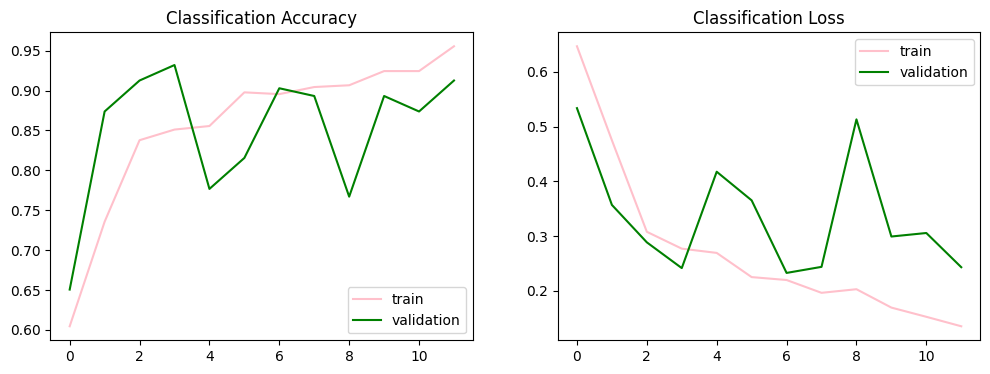

In [31]:
fig, (acc, loss) = plt.subplots(nrows = 1, ncols = 2)
fig.set_size_inches(12, 4)
acc.title.set_text('Classification Accuracy')
acc.plot(history.history['accuracy'], color = 'pink', label = 'train')
acc.plot(history.history['val_accuracy'], color = 'green', label = 'validation')
acc.legend(['train', 'validation'])

loss.title.set_text('Classification Loss')
loss.plot(history.history['loss'], color = 'pink', label = 'train')
loss.plot(history.history['val_loss'], color = 'green', label = 'validation')
loss.legend(['train', 'validation'])

plt.show()


In [32]:
from keras.models import load_model

model.save('./walnut_model.keras')  